# 1.Python ile Bag of Words:

In [1]:
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer içeri aktardık

In [2]:
# Veri seti oluşturduk
document = [
    "Köpek bahçede oynuyor.",
    "Köpek havuzda yüzüyor.",
    "Kedi topla oynuyor"
]

In [3]:
vectorizer = CountVectorizer()

In [4]:
x = vectorizer.fit_transform(document)   # Metni sayısal vektörlere çevirdik
print(f"Metnin sayısal vektör hali:\n{x}")  

Metnin sayısal vektör hali:
  (0, 3)	1
  (0, 0)	1
  (0, 4)	1
  (1, 3)	1
  (1, 1)	1
  (1, 6)	1
  (2, 4)	1
  (2, 2)	1
  (2, 5)	1


In [5]:
feature_names = vectorizer.get_feature_names_out()
print(f"Vektör temsili nitelikleri : {feature_names}")
# Vektör temsili nitelikleri

Vektör temsili nitelikleri : ['bahçede' 'havuzda' 'kedi' 'köpek' 'oynuyor' 'topla' 'yüzüyor']


In [6]:
# vektor temsili alalım
vector_temsili = x.toarray()
print(f"Vektör temsili:\n {vector_temsili}")

Vektör temsili:
 [[1 0 0 1 1 0 0]
 [0 1 0 1 0 0 1]
 [0 0 1 0 1 1 0]]


# 2.IMDB veri setiyle Bag of Words:

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter

In [13]:
data = pd.read_csv("archive/IMDB Dataset.csv")

In [14]:
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [17]:
# Metin verilerini alalım
documents = data["review"]
# Pozitif ve negatif labelları alalım
labels = data["sentiment"]

In [25]:
# metinleri temizleyelim
def clean_text(text):
    # Büyük harfleri küçük harfe dönüştürme
    text = text.lower()
    # Rakamları temizleme
    text = re.sub(r"\d+","",text)
    # Özel karakterlerin kaldırılması
    text = re.sub(r"[^\w\s]","",text)
    # kısa kelimelerin kaldırılması
    text = " ".join([word for word in text.split() if len(word) > 2])
    return text # temizlenmiş veri döndürecek

In [26]:
# Metinleri temizleme yapalım
cleaned_doc = [clean_text(row) for row in documents]

In [27]:
print(cleaned_doc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Burada veri çok büyük olduğundan yazdırmadı normal 

In [28]:
vectorizer = CountVectorizer()

In [36]:
x = vectorizer.fit_transform(cleaned_doc[:75])  # Bütün temiz metinleri vectorizer et

In [37]:
print(x)

  (0, 2470)	1
  (0, 3528)	16
  (0, 2498)	2
  (0, 2940)	1
  (0, 1575)	1
  (0, 2207)	1
  (0, 3525)	4
  (0, 70)	1
  (0, 3868)	2
  (0, 1901)	2
  (0, 1138)	2
  (0, 4023)	1
  (0, 1673)	1
  (0, 3544)	1
  (0, 201)	2
  (0, 2953)	2
  (0, 3555)	3
  (0, 1171)	1
  (0, 3903)	2
  (0, 1561)	1
  (0, 3945)	5
  (0, 2185)	1
  (0, 1314)	2
  (0, 3548)	1
  (0, 3379)	2
  :	:
  (74, 3507)	1
  (74, 3250)	1
  (74, 1136)	1
  (74, 195)	1
  (74, 2778)	1
  (74, 90)	1
  (74, 3629)	1
  (74, 3279)	1
  (74, 1403)	1
  (74, 3150)	1
  (74, 3421)	1
  (74, 2275)	1
  (74, 1331)	1
  (74, 3607)	1
  (74, 1817)	1
  (74, 3328)	1
  (74, 1212)	1
  (74, 3844)	1
  (74, 4035)	1
  (74, 2276)	1
  (74, 384)	1
  (74, 115)	1
  (74, 3902)	1
  (74, 288)	1
  (74, 1838)	1


In [42]:
# Kelime kümesini gösteriyoruz
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['abbot' 'abetted' 'abiding' ... 'zone' 'zooms' 'zwick']


In [43]:
vektor_temsili2 = x.toarray() 
print("Vektör temsili:\n",vektor_temsili2)

Vektör temsili:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Eğer tüm textleri alırsak hata alırız

In [46]:
df_bow = pd.DataFrame(vektor_temsili2,columns=feature_names)
print(df_bow)
# Feature names göre vektör temsilleri

    abbot  abetted  abiding  ability  able  about  aboveaverage  abraham  \
0       0        0        0        0     0      1             0        0   
1       0        0        0        0     0      1             0        0   
2       0        0        0        0     0      0             0        0   
3       0        0        0        0     0      0             0        0   
4       0        0        0        0     0      2             0        0   
..    ...      ...      ...      ...   ...    ...           ...      ...   
70      0        0        0        0     0      0             0        0   
71      0        0        0        0     0      3             0        0   
72      0        0        0        0     0      2             0        0   
73      0        0        0        0     0      1             0        0   
74      0        0        0        0     0      0             0        0   

    abrahams  absolute  ...  yuen  zack  zany  zellweger  zerog  zombie  \
0          0

In [49]:
word_counts = x.sum(axis=0).A1
word_freq = dict(zip(feature_names,word_counts))

In [53]:
print("Kelime Frekansları:\n",word_freq)
# Kelimeler ne kadar geçiyor bakarsak yanlış yazılan kelimelerde bir okadar çok

Kelime Frekansları:
 {'abbot': 1, 'abetted': 1, 'abiding': 2, 'ability': 1, 'able': 1, 'about': 54, 'aboveaverage': 1, 'abraham': 1, 'abrahams': 1, 'absolute': 1, 'absolutely': 5, 'absorb': 1, 'abstracted': 1, 'absurd': 2, 'academy': 1, 'accented': 1, 'accepted': 3, 'accepting': 1, 'accepts': 1, 'accident': 1, 'accidentally': 1, 'accomplished': 1, 'accomplishes': 1, 'according': 2, 'account': 1, 'accounts': 1, 'accurate': 3, 'accustomed': 1, 'achieve': 1, 'achieved': 1, 'achingly': 1, 'acolyte': 1, 'across': 1, 'acroyd': 1, 'act': 6, 'acting': 18, 'action': 6, 'actions': 1, 'actor': 6, 'actors': 17, 'actress': 4, 'actresses': 2, 'acts': 1, 'actual': 2, 'actually': 10, 'ada': 4, 'adabr': 1, 'adams': 1, 'adapted': 1, 'adas': 2, 'add': 1, 'added': 2, 'addict': 1, 'addiction': 1, 'adding': 2, 'addition': 2, 'adequate': 1, 'adjusterbr': 1, 'admitted': 1, 'adnausem': 1, 'adrian': 1, 'adult': 1, 'advent': 1, 'adventureoh': 1, 'affair': 1, 'affairbr': 1, 'affected': 3, 'affection': 1, 'afraid'

In [54]:
# İlk 10 kelimeyi yazdıralım
most_common = Counter(word_freq).most_common(10)
print("En çok geçen 10 kelime:\n",most_common)

En çok geçen 10 kelime:
 [('the', 1033), ('and', 463), ('this', 185), ('that', 174), ('with', 132), ('was', 131), ('for', 124), ('but', 123), ('movie', 123), ('his', 105)]


# 3.TF-IDF:

In [56]:
# Kütüphaneleri import edelim
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
documents = [
    "Köpek çok şirin bir hayvandır.",
    "İnekler süt içmezler.",
    "Kuşlar süt vermez ama kuşlarda köpekler ve inekler gibi birer hayvandır."
]

In [58]:
tfidf_vector = TfidfVectorizer()

In [64]:
x = tfidf_vector.fit_transform(documents)
print("TF-IDF:\n",x)

TF-IDF:
   (0, 4)	0.35543246785041743
  (0, 1)	0.4673509818107163
  (0, 16)	0.4673509818107163
  (0, 15)	0.4673509818107163
  (0, 9)	0.4673509818107163
  (1, 6)	0.6227660078332259
  (1, 12)	0.4736296010332684
  (1, 11)	0.6227660078332259
  (2, 2)	0.31377733704463995
  (2, 3)	0.31377733704463995
  (2, 5)	0.31377733704463995
  (2, 13)	0.31377733704463995
  (2, 10)	0.31377733704463995
  (2, 8)	0.31377733704463995
  (2, 0)	0.31377733704463995
  (2, 14)	0.31377733704463995
  (2, 7)	0.31377733704463995
  (2, 12)	0.2386357525755203
  (2, 4)	0.2386357525755203


In [62]:
feature_names = tfidf_vector.get_feature_names_out()
print("Feature Names:\n",feature_names)

Feature Names:
 ['ama' 'bir' 'birer' 'gibi' 'hayvandır' 'inekler' 'içmezler' 'kuşlar'
 'kuşlarda' 'köpek' 'köpekler' 'nekler' 'süt' 've' 'vermez' 'çok' 'şirin']


In [65]:
vector_temsili = x.toarray()
print("Vektör temsili:\n",vector_temsili)

Vektör temsili:
 [[0.         0.46735098 0.         0.         0.35543247 0.
  0.         0.         0.         0.46735098 0.         0.
  0.         0.         0.         0.46735098 0.46735098]
 [0.         0.         0.         0.         0.         0.
  0.62276601 0.         0.         0.         0.         0.62276601
  0.4736296  0.         0.         0.         0.        ]
 [0.31377734 0.         0.31377734 0.31377734 0.23863575 0.31377734
  0.         0.31377734 0.31377734 0.         0.31377734 0.
  0.23863575 0.31377734 0.31377734 0.         0.        ]]


Okunması kolay olması adına bunları dataframe icine alalım

In [67]:
df_tfidf = pd.DataFrame(vector_temsili,columns=feature_names)
print(df_tfidf)

        ama       bir     birer      gibi  hayvandır   inekler  içmezler  \
0  0.000000  0.467351  0.000000  0.000000   0.355432  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.622766   
2  0.313777  0.000000  0.313777  0.313777   0.238636  0.313777  0.000000   

     kuşlar  kuşlarda     köpek  köpekler    nekler       süt        ve  \
0  0.000000  0.000000  0.467351  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.622766  0.473630  0.000000   
2  0.313777  0.313777  0.000000  0.313777  0.000000  0.238636  0.313777   

     vermez       çok     şirin  
0  0.000000  0.467351  0.467351  
1  0.000000  0.000000  0.000000  
2  0.313777  0.000000  0.000000  


0 verileri o kelimenin o cümlede hiç geçmediğini anlatır.

In [70]:
tf_idf = df_tfidf.mean(axis=0)
print("Ortalama TF-IDF değerleri:\m",tf_idf)

Ortalama TF-IDF değerleri:\m ama          0.104592
bir          0.155784
birer        0.104592
gibi         0.104592
hayvandır    0.198023
inekler      0.104592
içmezler     0.207589
kuşlar       0.104592
kuşlarda     0.104592
köpek        0.155784
köpekler     0.104592
nekler       0.207589
süt          0.237422
ve           0.104592
vermez       0.104592
çok          0.155784
şirin        0.155784
dtype: float64


# 4.Spam veri seti ile TF-IDF:

In [88]:
# Kütüphane yükleyelim
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
df= pd.read_csv("spam.csv", encoding="ISO-8859-1")
# Encoding vermezsek calısmıyor utf 8 ile uyumlu degil hatası veriyor

In [99]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [103]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df.v2)
print("TF-IDF :\n",x)

TF-IDF :
   (0, 8267)	0.18238655630689804
  (0, 1069)	0.3264252905795869
  (0, 3594)	0.15318864840197105
  (0, 7645)	0.15566431601878158
  (0, 2048)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 4476)	0.2757654045621182
  (0, 8489)	0.22080132794235655
  (0, 3634)	0.1803175103691124
  (0, 1751)	0.2757654045621182
  (0, 4087)	0.10720385321563428
  (0, 5537)	0.15618023117358304
  (0, 1303)	0.24415547176756056
  (0, 2327)	0.25279391746019725
  (0, 5920)	0.2553151503985779
  (0, 4350)	0.3264252905795869
  (0, 8030)	0.22998520738984352
  (0, 3550)	0.1481298737377147
  (1, 5533)	0.5465881710238072
  (1, 8392)	0.4316010362639011
  (1, 4318)	0.5236458071582338
  (1, 4512)	0.4082988561907181
  (1, 5504)	0.27211951321382544
  (2, 77)	0.23012628226525952
  (2, 1156)	0.16541257593676326
  :	:
  (5570, 1786)	0.2829205787072918
  (5570, 3470)	0.2752778321471703
  (5570, 2892)	0.24400995680638932
  (5570, 7049)	0.20534386872930602
  (5570, 1778)	0.1366456751602606
  (5570, 8065)	0.2088086209

In [102]:
feature_names = vectorizer.get_feature_names_out()
print("Feature names:\n",feature_names)

Feature names:
 ['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


Çok fazla metin olmayan şeyler var onları temizlersek daha temiz sonuç elde ederiz

In [105]:
tfidf_score = x.mean(axis=0).A1
print("TF-IDF Skor:\n",tfidf_score)

TF-IDF Skor:
 [4.02037774e-04 1.16066862e-03 4.17161755e-05 ... 5.18705997e-05
 4.40605270e-04 6.45823682e-05]


In [107]:
df_tfidf = pd.DataFrame({"word":feature_names,"tfidf_score":tfidf_score})
print(df_tfidf)

              word  tfidf_score
0               00     0.000402
1              000     0.001161
2           000pes     0.000042
3     008704050406     0.000094
4             0089     0.000045
...            ...          ...
8667          ûªve     0.000051
8668            ûï     0.000052
8669       ûïharry     0.000052
8670            ûò     0.000441
8671        ûówell     0.000065

[8672 rows x 2 columns]


Skorları sıralı şekilde yapalım

In [111]:
# Büyükten küçüğe skor sıralama
df_tfidf_sort = df_tfidf.sort_values(by="tfidf_score",ascending=False)
print(df_tfidf_sort)

            word  tfidf_score
8609         you     0.044145
7756          to     0.036946
7627         the     0.026384
4087          in     0.021946
4939          me     0.021159
...          ...          ...
6002     praises     0.000013
6115      proove     0.000013
4850     makiing     0.000013
6597      sambar     0.000013
1279  attraction     0.000013

[8672 rows x 2 columns]


In [112]:
# Küçükten büyüğe skor sıralama
df_tfidf_sort = df_tfidf.sort_values(by="tfidf_score",ascending=True)
print(df_tfidf_sort)

            word  tfidf_score
7075     sorrows     0.000013
1279  attraction     0.000013
4850     makiing     0.000013
6115      proove     0.000013
6002     praises     0.000013
...          ...          ...
4939          me     0.021159
4087          in     0.021946
7627         the     0.026384
7756          to     0.036946
8609         you     0.044145

[8672 rows x 2 columns]


# 5.N-Gram Modelleri:

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
documents = [
    "Bu çalışma metin temsilleri adına gerçekleşiyor.",
    "Bu çalışma istediğin çalışma olabilir ve bunu sanman için gerçekleşiyor."
]

In [116]:
vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
vectorizer_trigram = CountVectorizer(ngram_range=(3,3))

In [121]:
x_unigram = vectorizer_unigram.fit_transform(documents)
unigram_features = vectorizer_unigram.get_feature_names_out()
print("Unigram Features:\n",unigram_features)

Unigram Features:
 ['adına' 'bu' 'bunu' 'gerçekleşiyor' 'istediğin' 'için' 'metin' 'olabilir'
 'sanman' 'temsilleri' 've' 'çalışma']


In [122]:
x_bigram = vectorizer_bigram.fit_transform(documents)
bigram_features = vectorizer_bigram.get_feature_names_out()
print("Bigram Features:\n",bigram_features)

Bigram Features:
 ['adına gerçekleşiyor' 'bu çalışma' 'bunu sanman' 'istediğin çalışma'
 'için gerçekleşiyor' 'metin temsilleri' 'olabilir ve' 'sanman için'
 'temsilleri adına' 've bunu' 'çalışma istediğin' 'çalışma metin'
 'çalışma olabilir']


In [123]:
x_trigram = vectorizer_trigram.fit_transform(documents)
trigram_features = vectorizer_trigram.get_feature_names_out()
print("Trigram Features:\n",trigram_features)

Trigram Features:
 ['bu çalışma istediğin' 'bu çalışma metin' 'bunu sanman için'
 'istediğin çalışma olabilir' 'metin temsilleri adına' 'olabilir ve bunu'
 'sanman için gerçekleşiyor' 'temsilleri adına gerçekleşiyor'
 've bunu sanman' 'çalışma istediğin çalışma' 'çalışma metin temsilleri'
 'çalışma olabilir ve']


# 6.Word Embedding:

In [125]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ------------------- -------------------- 7.3/14.8 MB 37.6 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 40.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ---------------------------------------- 10.3/10.3 MB 71.2 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=ae0ebbe20fd5414b4aa817f0b6c3fee44e3ed97cccc9cf8173085a37da434968
  Stored in directory: c:\users\namkodx\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-non

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.


In [133]:
# Kütüphaneleri yükleme
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec , FastText
from gensim.utils import simple_preprocess

In [129]:
# Örnek veri seti oluşturduk
sentences = [
    "Doğal dil işleme, metinleri anlamlandırmak için kullanılan bir yapay zeka dalıdır.",
    "Makine öğrenmesi, büyük veri setlerinden anlamlı sonuçlar çıkarmaya yardımcı olur.",
    "Derin öğrenme, sinir ağları kullanarak karmaşık problemleri çözmeyi sağlar.",
    "Python, veri bilimi ve yapay zeka uygulamaları için popüler bir programlama dilidir.",
    "Kelime gömme yöntemleri, metinleri sayısal vektörlere dönüştürerek analiz etmeye olanak tanır.",
    "CNN'ler, görüntü işleme alanında yaygın olarak kullanılan derin öğrenme modelleridir.",
    "RNN'ler, ardışık veri ve doğal dil işleme problemlerinde güçlüdür.",
    "Transformers modelleri, büyük dil modelleri için en son teknolojilerden biridir.",
    "GPT gibi büyük dil modelleri, çok dilli metin işleme yeteneğine sahiptir.",
    "Tokenization, metinleri küçük parçalara ayırarak işlenebilir hale getirir."
]

In [131]:
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

In [135]:
word2_vec_model = Word2Vec(sentences=tokenized_sentences,vector_size=50,window=5,min_count=1,sg=0)

In [136]:
fast_text_model = FastText(sentences=tokenized_sentences,vector_size=50,window=5,min_count=1,sg=0)

Modelleri kurduk şimdi PCA ile 3d olarak görselleştirelim

In [142]:
def plot_word_embedding(model,title):
    
    word_vectors = model.wv
    
    words = list(word_vectors.index_to_key)[:1000]
    vectors = [word_vectors[word] for word in words]
    
    # PCA 
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)
    
    # 3d görselleştirme
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111,projection="3d")
    
    # Vektörleri çiz
    ax.scatter(reduced_vectors[:,0],reduced_vectors[:,1],reduced_vectors[:,2])
    
    # Kelimeleri etiketle
    for i, word in enumerate(words):
        ax.text(reduced_vectors[i,0],reduced_vectors[i,1],reduced_vectors[i,2],word,fontsize=8)
        
    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.show()

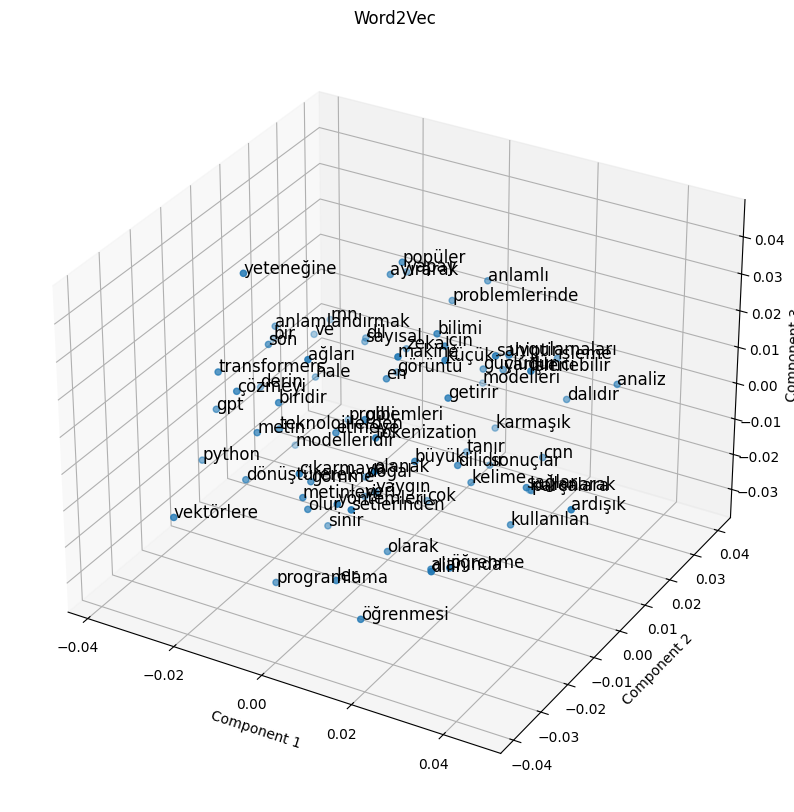

In [141]:
plot_word_embedding(word2_vec_model,"Word2Vec")

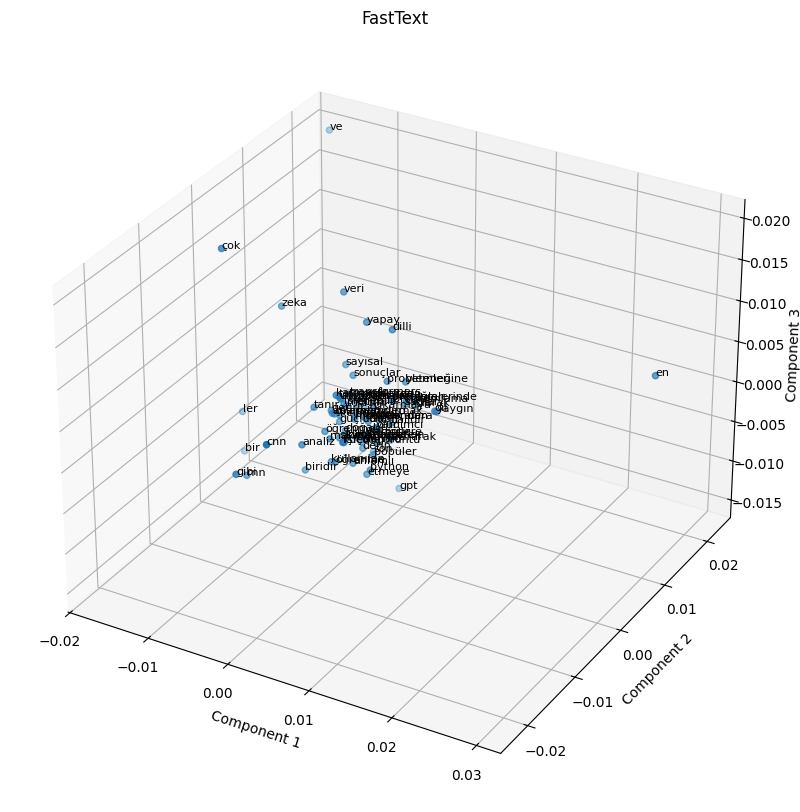

In [143]:
plot_word_embedding(fast_text_model,"FastText")

# 7.IMDB veri setiyle Word Embedding:

In [146]:
# Kütüphaneleri yükleme
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [147]:
df = pd.read_csv("archive/IMDB Dataset.csv")

In [148]:
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [149]:
documents = df["review"] # Cümleleri documents değişkenin içerisine alalım

In [150]:
# metinleri temizleyelim
def clean_text(text):
    # Büyük harfleri küçük harfe dönüştürme
    text = text.lower()
    # Rakamları temizleme
    text = re.sub(r"\d+","",text)
    # Özel karakterlerin kaldırılması
    text = re.sub(r"[^\w\s]","",text)
    # kısa kelimelerin kaldırılması
    text = " ".join([word for word in text.split() if len(word) > 2])
    return text # temizlenmiş veri döndürecek

In [151]:
cleaned_documents = [clean_text(doc) for doc in documents]

In [153]:
# Metin tokenizasyonu
tokenized_documents = [simple_preprocess(doc) for doc in cleaned_documents]

In [154]:
# Modelleri tanımlayalım
model = Word2Vec(sentences=tokenized_sentences,vector_size=50,window=5,min_count=1,sg=0)
word_vectors = model.wv

In [156]:
words = list(word_vectors.index_to_key)[:500]
vectors = [word_vectors[word] for word in words]

In [157]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(vectors)
clusters = kmeans.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [168]:
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

Text(0.5, 1.0, 'Word2Vec')

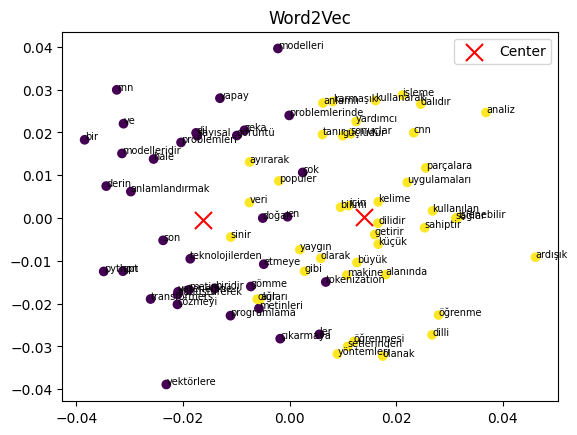

In [169]:
plt.figure()
plt.scatter(reduced_vectors[:,0],reduced_vectors[:,1],c=clusters,cmap="viridis")
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],c="red",marker="x",s=150,label="Center")
plt.legend()

for i, word in enumerate(words):
    plt.text(reduced_vectors[i,0],reduced_vectors[i,1],word,fontsize=7)
    
plt.title("Word2Vec")